<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math

# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.11

Reconsider the lawn chair problem of Example 3.3. Notice that the objective function $f(x, y)$ tends to infinity as $x$ or $y$ approaches zero, and that $f(x, y)$ is undefined on the lines $x=0$ and $y=0$ that form the boundary of the feasible region. Presumably, the estimates of price elasticity are notaccurate when extrapolated all the way to $x=0$ or $y=0$.

Relembrando o Exemplo 3.3

> **Exemplo 3.3:** A manufacturer of lawn furniture makes two types of lawn chairs, one with a wood frame and one with a tubular aluminum frame. The wood–frame model costs $\$18$ per unit to manufacture, and the aluminum–framemodel costs $\$10$ per unit. The company operates in a market where the number of units that can be sold depends on the price. It is estimated that in order to sell $x$ units per day of the wood–frame model and $y$ units per day of the aluminum–frame model, the selling price cannot exceed $10+31x^{-0,5} + 1.3y^{-0.2}\$$/unit for wood–frame chairs, and $5+15y^{-0.4} + 0.8x^{-0.08}\$$/unit for aluminum–frame chairs. Find the optimal production levels.



### a) Correct this model deficiency by altering the feasible region.

A função objeto corresponde a:

In [ ]:
x, y = var('x y', real=True)

f = x*(10 + 31*x**-0.5 + 1.3*y**-0.2) - 18*x \
  + y*( 5 + 15*y**-0.4 + 0.8*x**-0.08) - 10*y

Math(f"""
\\begin{{aligned}}
f(x, y) &= {latex(f)} \\\\
        &= {latex(simplify(f))}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Podemos observar o comportamento da função no gráfico seguinte. Note que $x$ e $y$ são apresentados no intervalo $[1\cdot10^{-5}, 10]$.

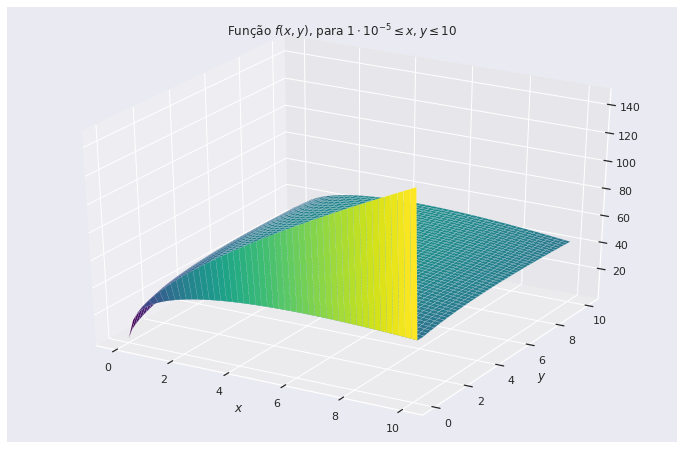

In [ ]:
plot3d(f, (x, 1e-5, 10), (y, 1e-5, 10), title="Função $f(x,y)$, para $1\\cdot10^{-5}\\leq x, y \\leq 10$", xlabel="$x$", ylabel="$y$", zlabel='$f(x,y)$')

Observe que a solução é indefinida se $x=0$ ou se $y=0$ no gráfico acima. Na seção 3.2, uma busca aleatória de $N = 1,000$ pontos sobre a região $S$, consistindo todos os pontos $(x, y)$ que satisfazem $0 \leq x \leq 10$ e $0 \leq y \leq 10$, deu um máximo em $f(x,y) = 52.06$, sendo $x = 4.8$ e $y = 5.9$. Além disso, observe que já restringimos a região viável para que seja limitada. No entanto, uma análise mais detalhada mostra que este não é o máximo de  $f (x, y)$ nesta região. Na verdade, o máximo nem existe. Por exemplo, defina $x = 4.8 $, e considere $f(y) = f (4.8, y)$ mostrada no gráfico a seguir.


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


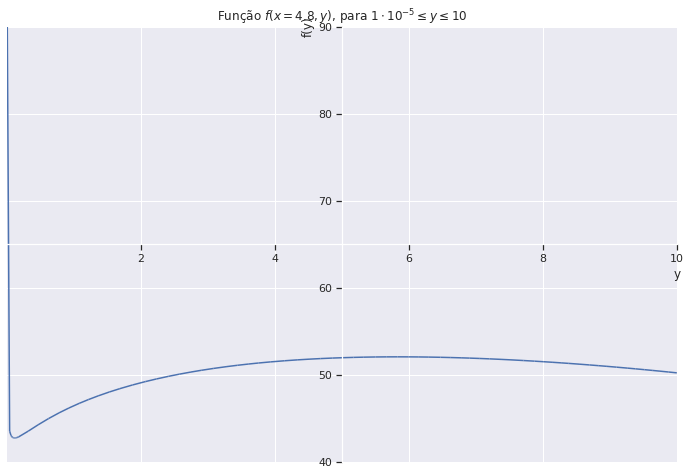

In [ ]:
plot(f.subs({x: 4.8}), (y, 1e-5, 10), ylim=[40, 90], title="Função $f(x=4.8,y)$, para $1\\cdot10^{-5}\\leq y \\leq 10$")

Em uma escala maior, a função eventualmente atinge um máximo local próximo a $y = 5.9$, mas quando $x$ se aproxima de zero, a função tende para o infinito. A razão pela qual isso não apareceu na busca aleatória é que a porção da região $S$ em que $f(x, y)$ excede o máximo $f = 52.06$ é uma fração extremamente pequena do total, então a probabilidade de que seria selecionado um ponto $(x, y)$ nesta região é extremamente baixa. Esta situação é apenas um fato das suposições de modelagem propostas. Logo, o modelo não deveria ser válido para valores de $x$ ou $y$ próximos de zero.

Assim, é razoável supor que $ x \geq 1 $ e $ y \geq 1 $. Dado esta nova restrição, o mesmo gráfico em três dimensões será apresentado a seguir.

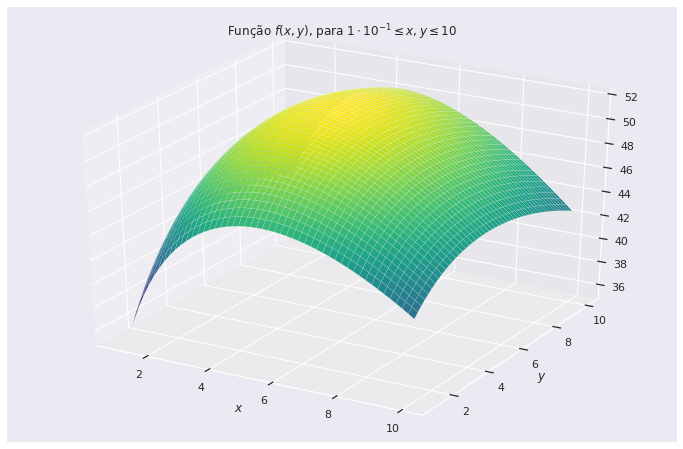

In [ ]:
plot3d(f, (x, 1, 10), (y, 1, 10), title="Função $f(x,y)$, para $1\\cdot10^{-1}\\leq x, y \\leq 10$", xlabel="$x$", ylabel="$y$", zlabel='$f(x,y)$')

### b) Comment on the robustness of the decisions you made in part (a).

Pelo gráfico em duas dimensões  apresentado no item $a)$, vemos que $f(y)=f(x=4.8, y)$ tende a infinito positivo, quando $y$ tende a zero. Porém, para um $y$ suficientemente grande "escapamos" desta região indesejada.

Desta forma, poderíamos escolher outros valores relativamente maiores para $x$ e para $y$, como $1$. Porém, deve-se ter cuidado com valores menores que $0.01$. Veja isso no gráfico abaixo uma versão do gráfico  em duas dimensões apresentado no item $a)$, mas para um intervalo menor da variável $y$.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


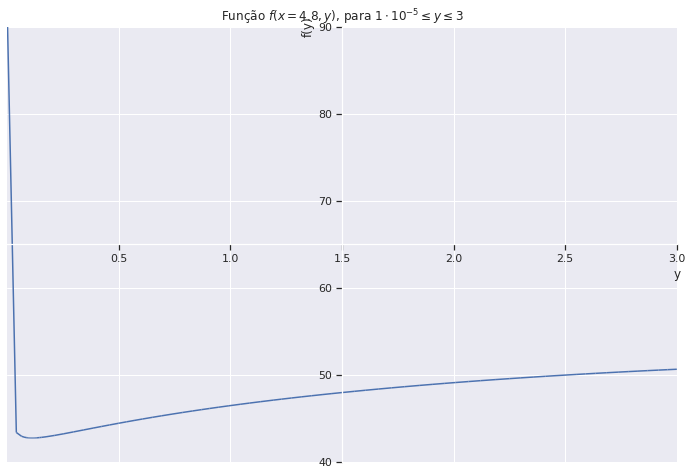

In [ ]:
plot(f.subs({x: 4.8}), (y, 1e-5, 3), ylim=[40, 90], title="Função $f(x=4.8,y)$, para $1\\cdot10^{-5}\\leq y \\leq 3$")

### c) Show that, for your corrected model, the optimal solution lies in the interior of the feasible region. Locate any local maximum of $f(x, y)$ on the boundary, and show that at every such point $\nabla f$ points into the interior.

O limite da região viável $\Omega$ nas bordas consiste na porção da reta $g_1(x, y) = x = 1$ representado pelo gráfico abaixo

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


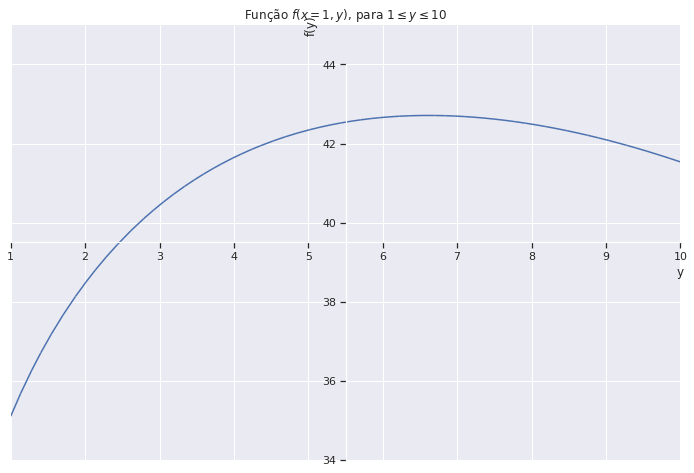

In [ ]:
plot(f.subs({x: 1}), (y, 1, 10), ylim=[34, 45], title="Função $f(x=1,y)$, para $1\\leq y \\leq 10$")

e na porção da reta $g_2(x, y) = y = 1$ apresentado pelo gráfico abaixo

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


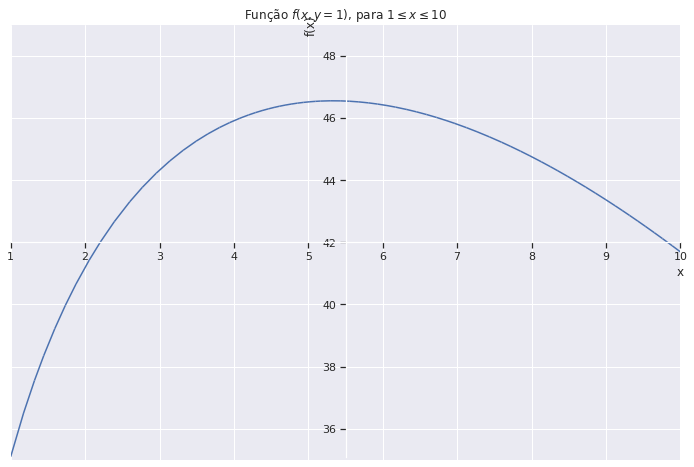

In [ ]:
plot(f.subs({y: 1}), (x, 1, 10), ylim=[35, 49], title="Função $f(x,y=1)$, para $1\\leq x \\leq 10$")

Nota-se que em ambas as retas há um único máximo local. Desta forma, procuraremos o ponto de máximo local para cada reta e verificaremos nestes pontos qual a direção do vetor gradiente.

#### Restrição 1: $g_1(x,y) = x - 1 $

Para a reta $g_1(x,y)$, correspondente a $f(x=1, y)$, apliquemos o método de Newton.

In [ ]:
def MetodoNewton(variaveis, valores_iniciais, funcao, numero_iteracoes=10):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    
    x_[:, 0] = valores_iniciais

    f = lambdify(variaveis, funcao, 'numpy')

    gradiente = Matrix(derive_by_array(funcao, variaveis))
    gradiente_f_original = lambdify(variaveis, gradiente, 'numpy')
    gradiente_f = lambda vetor: gradiente_f_original(*vetor.T.flatten())

    hessiana = hessian(funcao, variaveis)

    hessiana_inversa_f_original = lambdify(variaveis, hessiana.inv(), 'numpy')
    hessiana_inversa_f = lambda vetor: hessiana_inversa_f_original(*vetor.T.flatten())
    
    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        x_k_next = x_k - hessiana_inversa_f(x_k) @ gradiente_f(x_k)
        x_[:, k+1] = x_k_next.T
    
    retorno = {f'{variavel}': x_[i] for i, variavel in enumerate(variaveis)}
    retorno[f'f{Tuple(*variaveis)}'] = [f(*x_i) for x_i in x_.T]
    
    return pd.DataFrame(retorno)

Logo, temos a seguinte função

In [ ]:
fx1 = f.subs({x: 1})
Math(f"f(x=1, y)={latex(fx1)}")

<IPython.core.display.Math object>

Para executar o método de Newton para esta função, necessitamos de seu vetor gradiente, da sua Hessiana e do inverso da Hessiana. Estes são:

In [ ]:
grad_f = Matrix(derive_by_array(fx1, (y,)))
hessian_f = hessian(fx1, [y])

display(Math(f"""
\\begin{{aligned}}
\\nabla f(x, y) &= {latex(grad_f)} \\\\
H = \\nabla^2 f(x, y) &= {latex(hessian_f)} \\\\
H^{{-1}} = \\nabla^2 f(x, y) &= {latex(hessian_f.inv())} \\\\
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

O método de Newton então executádo, obteve

In [ ]:
res_c = MetodoNewton(
    variaveis=(y, ),
    valores_iniciais=(1,),
    funcao=fx1,
    numero_iteracoes=7
)
res_c

,y,"f(y,)"
0,1.000000,35.100000
1,2.380779,39.335614
2,4.404814,41.979207
3,6.064425,42.670850
4,6.582904,42.710281
5,6.615080,42.710412
6,6.615189,42.710412
7,6.615189,42.710412


Por fim, o vetor gradiente para este ponto aponta para

In [ ]:
solucao_c1 = {
    x: 1,
    y: res_c.iloc[-1][0]
}
grad_c1 = Matrix(derive_by_array(f, (x, y))).subs(solucao_c1)

display(Math(f"""
\\begin{{aligned}}
\\nabla f(x={1}, y={solucao_c1[y]}) &= {latex(grad_c1)}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

#### Restrição 2: $g_2(x,y) = y - 1 $

Para a reta $g_2(x,y)$, correspondente a $f(x, y=1)$, apliquemos o método de Newton também.

Temos então a função

In [ ]:
fy1 = f.subs({y: 1})
Math(f"f(x, y=1)={latex(fy1)}")

<IPython.core.display.Math object>

Para executar o método de Newton para esta função, necessitamos de seu vetor gradiente, da sua Hessiana e do inverso da Hessiana. Estes são:

In [ ]:
grad_f = Matrix(derive_by_array(fy1, (x,)))
hessian_f = hessian(fy1, [x])

display(Math(f"""
\\begin{{aligned}}
\\nabla f(x, y) &= {latex(grad_f)}^T \\\\
H = \\nabla^2 f(x, y) &= {latex(hessian_f)} \\\\
H^{{-1}} = \\nabla^2 f(x, y) &= {latex(hessian_f.inv())} \\\\
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

O método de Newton então executádo, obteve

In [ ]:
res_c = MetodoNewton(
    variaveis=(x, ),
    valores_iniciais=(1,),
    funcao=fy1,
    numero_iteracoes=7
)
res_c

,x,"f(x,)"
0,1.000000,35.100000
1,2.137370,41.753670
2,3.708344,45.571354
3,4.942192,46.507548
4,5.313285,46.557679
5,5.335181,46.557831
6,5.335249,46.557831
7,5.335249,46.557831


Por fim, o vetor gradiente para este ponto aponta para

In [ ]:
solucao_c2 = {
    x: res_c.iloc[-1][0],
    y: 1
}
grad_c2 = Matrix(derive_by_array(f, (x, y))).subs(solucao_c2)

display(Math(f"""
\\begin{{aligned}}
\\nabla f(x={solucao_c2[x]}, y=1) &= {latex(grad_c2)}.
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

#### Conclusão

Em ambos os casos, o gradiente de $f(x, y)$ aponta para o interior da região demarcada pelas duas retas, indicando que $f(x, y)$ aumenta a medida que seguimos nessa direção (ou seja, a derivada direcional de $f(x, y)$ na direção para dentro é positiva). Então, qualquer máximo global deve ocorrer no interior da região.

#### Bônus: Tentativa de solução anterior com lagrangiana

In [ ]:
μ1 = symbols('\mu_1', real = True)

g1 = x - 1
Lx = f - μ1 * -g1

Math(f"""
\\begin{{aligned}}
L(x, y, \\mu_1)
 &= L(x, y) + \\mu_1 \cdot g_1(x, y) \\\\
 &= L(x, y) + \\mu_1 \cdot ({latex(g1)}) \\\\
 &= {latex(Lx)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Suas derivadas

In [ ]:
dLdx = diff(Lx, x)
dLdy = diff(Lx, y)
dLdμ1 = diff(Lx, μ1)

mus = '\mu_1'
Math(f"""
\\begin{{aligned}}
\\frac{{dL(x, y, {mus})}}{{dp_1}} &= {latex(dLdx)} \\\\
\\frac{{dL(x, y, {mus})}}{{dp_2}} &= {latex(dLdy)} \\\\
\\frac{{dL(x, y, {mus})}}{{d\mu_1}} &= {latex(dLdμ1)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

E igualando-as a zero, teremos

In [ ]:
# solucao_1 = solve(
#     [dLdx, dLdy, dLdμ1],
#     [x, y, μ1],
#     dict=True
# )

solucao_1 = {
    x: 1,
    y: 6.61518,
    μ1: 7.96754
}
Math(latex(solucao_1))

<IPython.core.display.Math object>

Temos o vetor gradiente de $g_1(x, y)$ como

In [ ]:
g1_grad = Matrix([[diff(g1, x)], [diff(g1, y)]])

Math(f"\\nabla g_1(x, y) = {latex(g1_grad)}")

<IPython.core.display.Math object>

Dado que no ponto máximo o gradiente de $f(x, y)$ é $\mu_1 \cdot \nabla g_1(x, y)$, que é

In [ ]:
Math(latex(g1_grad * solucao_1[μ1]))

<IPython.core.display.Math object>

De forma similar, para a linha $f(x, y=1)$, apliquemos o multiplicador de Lagrange:

In [ ]:
μ2 = symbols('\mu_2', real = True)

g2 = y - 1
Ly = f + μ2 * g2

Math(f"""
\\begin{{aligned}}
L(x, y, \\mu_1)
 &= L(x, y) + \\mu_1 \cdot g_2(x, y) \\\\
 &= L(x, y) + \\mu_1 \cdot ({latex(g2)}) \\\\
 &= {latex(Lx)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Suas derivadas

In [ ]:
dLdx = diff(Ly, x)
dLdy = diff(Ly, y)
dLdμ2 = diff(Ly, μ2)

mus = '\mu_2'
Math(f"""
\\begin{{aligned}}
\\frac{{dL(x, y, {mus})}}{{dp_1}} &= {latex(dLdx)} \\\\
\\frac{{dL(x, y, {mus})}}{{dp_2}} &= {latex(simplify(dLdy))} \\\\
\\frac{{dL(x, y, {mus})}}{{d\mu_2}} &= {latex(dLdμ2)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

E igualando-as a zero, teremos

In [ ]:
# solucao_2 = solve(
#     [dLdx, dLdy, dLdμ2],
#     [x, y, μ2],
#     dict=True
# )

solucao_2 = {
    x: 5.33524,
    y: 1,
    μ2: 3.31254
}
Math(latex(solucao_2))

<IPython.core.display.Math object>

Temos o vetor gradiente de $g_2(x, y)$ como

In [ ]:
g2_grad = Matrix([[diff(g2, x)], [diff(g2, y)]])

Math(f"\\nabla g_2(x, y) = {latex(g2_grad)}")

<IPython.core.display.Math object>

Dado que no ponto máximo o gradiente de $f(x, y)$ é $\mu_2 \cdot \nabla g_2(x, y)$, que é

In [ ]:
Math(latex(g2_grad * solucao_2[μ2]))

<IPython.core.display.Math object>

Em ambos os casos, o gradiente de $f(x, y)$ aponta o interior da região demarcada pelas duas retass, indicando que $f(x, y)$ aumenta à medida que viajamos nessa direção (ou seja, a derivada direcional de $f(x, y)$ na direção para dentro é positiva). Então, qualquer máximo global deve ocorrer no interior da região.